In [6]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [58]:
def fourier_transform(x, y, k=None):
    '''
    Fourier Transform : f(k) = int_dx {f(x)*exp(-ikx) * 1/sqrt(2 pi)}
    inputs (x, y, k=None) returns (k, f(k))
    default k = 100 points from k = 0 to max_k/2 
    '''
    if k is None: k = 2*np.pi * np.fft.rfftfreq(y.shape[0], np.diff(x)[0]) / 2
    return [k, np.array([np.trapz(y * np.exp(-1j * ki * x) , x) for ki in k]) / (2*np.pi)**(1/2)]

def real_fast_fourier_transform(x, y):
    '''
    Fast Fourier Transform with Real valued f(x) 
    inputs (x, y) and returns (k, f(k))
    '''
    return (2*np.pi * np.fft.rfftfreq(y.shape[0], np.diff(x).min()), np.fft.rfft(y, norm='ortho') / np.pi)

[(0, 2)]

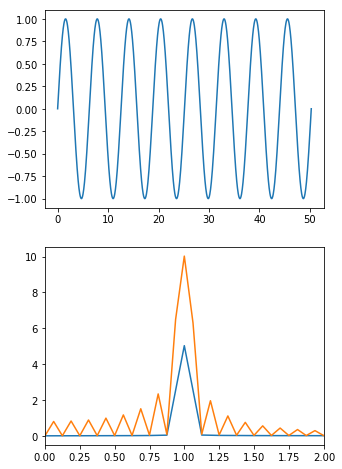

In [61]:
k = 1

x = np.linspace(0, 8 * 2*np.pi/k, 1001)
y = np.sin(k * x)

fig, ax = plt.subplots(nrows=2, figsize=(5, 8))
ax[0].plot(x, y)

k, fk = real_fast_fourier_transform(x, y)
fk = np.abs(fk)
ax[1].plot(k, fk)

k, fk = fourier_transform(x, y,)# k=np.linspace(0, 2, 1000))
fk = np.abs(fk) 
ax[1].plot(k, fk,'-')

ax[1].set(xlim=[0, 2])